In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


## Apply ##
apply() method applies the input function to all values in the specified table column (column values as function parameters)

In [3]:
ages = pd.DataFrame({
    'Person': np.array(['A', 'B', 'C', 'D']),
    'Age': np.array([63, 110, 99, 102])}
)
ages

,Person,Age
0,A,63
1,B,110
2,C,99
3,D,102


In [4]:
def cut_off_at_100(z):
    return min(z, 100)

In [4]:
cut_off_at_100(3)

3

In [5]:
cut_off_at_100(107)

100

In [5]:
cut_age_array = ages['Age'].apply(cut_off_at_100)
cut_age_array

0     63
1    100
2     99
3    100
Name: Age, dtype: int64

In [7]:
ages['Cut off ages'] = cut_age_array
ages

,Person,Age,Cut off ages
0,A,63,63
1,B,110,100
2,C,99,99
3,D,102,100


In [8]:
type(cut_off_at_100)

function

## Apply with Multiple Columns ##

In [9]:
temperatures = pd.read_csv('temperatures.csv')
temperatures

,Day,Low,High
0,1,44.96,57.92
1,2,48.92,62.06
2,3,51.98,60.98
3,4,53.96,57.92
4,5,57.02,64.04
...,...,...,...
207,208,51.98,71.96
208,209,51.08,71.96
209,210,51.08,71.96
210,211,51.08,71.06


<AxesSubplot:xlabel='Day'>

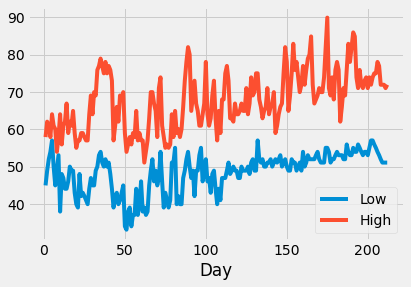

In [10]:
temperatures.plot.line('Day')

<AxesSubplot:ylabel='Frequency'>

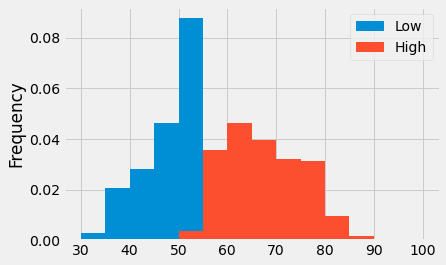

In [11]:
temperatures[['Low', 'High']].plot.hist(bins=np.arange(30, 105, 5), density=True)

<AxesSubplot:xlabel='Low', ylabel='High'>

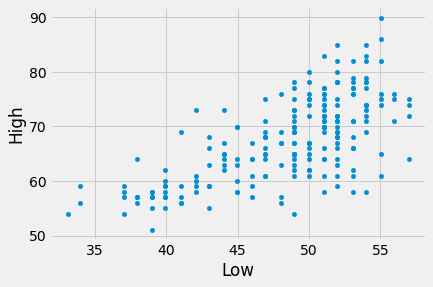

In [12]:
temperatures.plot.scatter('Low', 'High')

In [13]:
# Difference between high temp and low temp

def difference(x):
    return x[0]-x[1]

difference((65, 54))

11

In [14]:
# Apply difference function with High column as first parameter & Low column as second parameter
daily_spread = temperatures[["High","Low"]].apply(difference, axis=1)
daily_spread

0      12.96
1      13.14
2       9.00
3       3.96
4       7.02
       ...  
207    19.98
208    20.88
209    20.88
210    19.98
211    20.88
Length: 212, dtype: float64

## Example: Prediction ##

The data below are (Charles Darwin’s cousin) Sir Francis Galton’s carefully collected measurements on the heights of parents and their adult children. 

- Each row corresponds to one adult child. 

- The variables (columns) are a numerical code for the family, the heights (in inches) of the father and mother, a “midparent height” which is a weighted average of the height of the two parents, the number of children in the family, as well as the child’s birth rank (1 = oldest), gender, and height.

A primary reason for collecting the data was to be able to predict the adult height of a child born to parents similar to those in the dataset.

In this exercise, we will predict a child's height by using midparent height. Thus midparent height is our predictor variable.



In [7]:
galton = pd.read_csv('galton.csv')
galton

,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,1,78.5,67.0,75.43,4,1,male,73.2
1,1,78.5,67.0,75.43,4,2,female,69.2
2,1,78.5,67.0,75.43,4,3,female,69.0
3,1,78.5,67.0,75.43,4,4,female,69.0
4,2,75.5,66.5,73.66,4,1,male,73.5
...,...,...,...,...,...,...,...,...
929,203,62.0,66.0,66.64,3,1,male,64.0
930,203,62.0,66.0,66.64,3,2,female,62.0
931,203,62.0,66.0,66.64,3,3,female,61.0
932,204,62.5,63.0,65.27,2,1,male,66.5


The table below (heights) consists of just the midparent heights and child’s heights. The scatter plot of the two variables shows a positive association. 

In [8]:
heights = galton.iloc[:, [3, 7]].rename(columns={'midparentHeight':'MidParent', 'childHeight': 'Child'})
heights

,MidParent,Child
0,75.43,73.2
1,75.43,69.2
2,75.43,69.0
3,75.43,69.0
4,73.66,73.5
...,...,...
929,66.64,64.0
930,66.64,62.0
931,66.64,61.0
932,65.27,66.5


<AxesSubplot:xlabel='MidParent', ylabel='Child'>

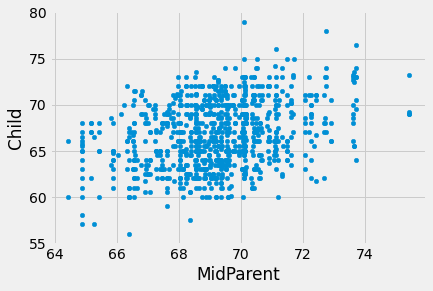

In [9]:
heights.plot.scatter('MidParent', 'Child')

If we encounter a new couple, similar to those in his dataset, and would like to predict how tall their child would be,  one reasonable approach would be to find parents with similar midparent height to this couple and based the prediction the heights of children of this similar group of parents.  The prediction could be, for example, equal to the average child’s height calculated from these parents.  

Let's say that the midparent height of a new couple is 68 inches. What would be the prediction for how tall their child will be? Let's apply the approach discussed above.

But, what is a resonable definition for 'similar' midparent height?
Let's assume “similar” to mean “within half an inch”. The figure below shows all the points corresponding to a midparent height between 67.5 (68-0.5) inches and 68.5 (68+0.5) inches. These are all the points in the strip between the red lines. Each of these points corresponds to one child; our prediction of the height of the new couple’s child is the average height of all the children in the strip. That’s represented by the gold dot in the second figure.

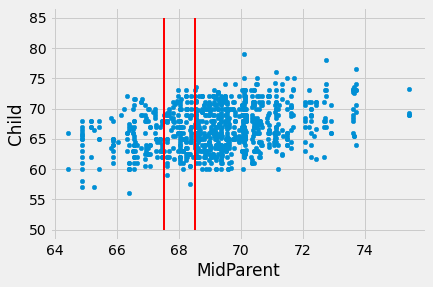

In [18]:
# this code draws the red line. 
heights.plot.scatter('MidParent', 'Child')
plt.plot([67.5, 67.5], [50, 85], color='red', lw=2)
plt.plot([68.5, 68.5], [50, 85], color='red', lw=2);

In [10]:
# Select all rows where MidParent is between 67.5 and 68.5
nearby = heights[(heights['MidParent'] >= 67.5) & (heights['MidParent'] <= 68.5)]
nearby

,MidParent,Child
233,68.44,62.0
396,67.94,71.2
397,67.94,67.0
516,68.33,62.5
517,68.23,73.0
...,...,...
885,67.60,69.0
886,67.60,68.0
887,67.60,67.7
888,67.60,64.5


In [11]:
#Find the average of child height of the selected rows
nearby['Child'].mean()

66.24045801526718

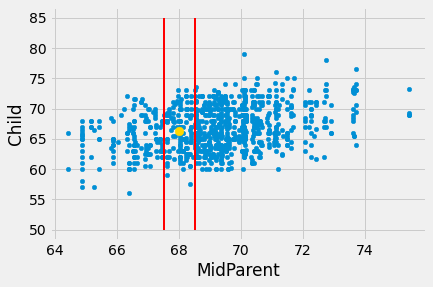

In [12]:
heights.plot.scatter('MidParent', 'Child')
plt.plot([67.5, 67.5], [50, 85], color='red', lw=2)
plt.plot([68.5, 68.5], [50, 85], color='red', lw=2)
plt.scatter(68, 66.24, color='gold', s=75);

Now let's implement our height prediction method as a function so we can do prediction for any new couple (not just for midparent height of 68 inches)

In [22]:
def predict_child(h):
    nearby = heights[(heights['MidParent'] >= h-0.5) & (heights['MidParent'] <= h+0.5)]
    return nearby['Child'].mean()

In [23]:
predict_child(68)

66.24045801526718

In [24]:
predict_child(65)

64.22962962962963

Let's do prediction for parents in each row of the table and add the prediction as new column next to actual child height:

In [13]:
predictions = heights['MidParent'].apply(predict_child)

NameError: name 'predict_child' is not defined

In [14]:
heights['Child Prediction']= predictions

NameError: name 'predictions' is not defined

In [27]:
heights.head(10)

,MidParent,Child,Child Prediction
0,75.43,73.2,70.100000
1,75.43,69.2,70.100000
2,75.43,69.0,70.100000
3,75.43,69.0,70.100000
4,73.66,73.5,70.415789
5,73.66,72.5,70.415789
6,73.66,65.5,70.415789
7,73.66,65.5,70.415789
8,72.06,71.0,68.502500
9,72.06,68.0,68.502500


Plot predictions along with real data points. 

Galton’s calculations and visualizations were very similar to ours, except that he didn’t have Python. He drew the graph of averages through the scatter diagram and noticed that it roughly followed a straight line. This straight line is now called the regression line and is one of the most common methods of making predictions. 

<AxesSubplot:xlabel='MidParent', ylabel='Child Prediction'>

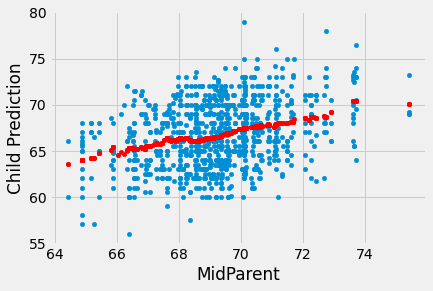

In [28]:
ax1=heights.plot.scatter('MidParent','Child')
heights.plot.scatter('MidParent','Child Prediction', ax=ax1, color="red")